In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
redWinedataset = pd.read_excel('winequality-red.xlsx')

In [3]:
redWinedataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
#Checking for null bvalues in the dataset
redWinedataset.isnull().values.any()

False

In [5]:
#Creating the independent variables(features) and dependent variable(target variable)
x = redWinedataset.iloc[:,:-1].values
y = redWinedataset.iloc[:,-1].values

In [6]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,[0,3,5,6,8,10]] = sc.fit_transform(x_train[:,[0,3,5,6,8,10]])
x_test[:,[0,3,5,6,8,10]] = sc.transform(x_test[:,[0,3,5,6,8,10]])

In [8]:
##Training the Logistic Regressor model on the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
##Predicting test results
y_pred = classifier.predict(x_test)
print(y_pred)

[6 5 6 5 6 5 5 6 5 5 5 5 6 5 6 6 7 6 6 5 6 5 6 5 5 5 5 6 5 6 6 6 6 5 6 6 5
 5 6 6 5 6 7 7 6 5 5 6 5 6 5 5 6 7 6 5 5 5 6 5 5 6 6 6 5 6 5 6 6 6 5 5 5 5
 5 6 5 5 5 6 5 5 6 6 5 5 6 5 5 5 5 5 6 5 6 5 6 5 5 6 7 6 6 6 6 5 6 5 6 5 6
 5 6 5 6 6 6 7 6 6 5 6 5 5 6 6 5 5 6 6 5 5 6 6 6 5 6 5 6 5 6 5 5 5 6 6 6 6
 6 5 6 6 5 6 6 6 5 5 6 6 6 6 6 5 6 5 6 6 5 6 6 5 5 7 6 6 6 7 6 5 5 7 5 6 7
 5 6 6 5 6 6 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 6 6 5 6 5 5 7 5 5 6 6 6 5 5 6
 6 5 5 6 6 6 5 5 5 6 5 6 6 6 6 6 6 6 5 5 5 5 6 5 5 5 5 6 5 5 5 5 5 5 5 5 5
 5 5 7 5 5 5 5 5 5 6 6 5 5 5 6 6 6 6 5 6 6 5 7 5 6 6 5 5 5 6 6 6 6 6 5 5 6
 5 5 5 5 6 5 5 5 6 6 5 5 5 5 5 6 5 5 5 7 6 6 5 6]


In [10]:
##Calculating accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(ac)
print(cm)

0.634375
[[  0   0   2   0   0   0]
 [  0   0   7   4   0   0]
 [  0   0 108  26   1   0]
 [  0   0  46  90   6   0]
 [  0   0   2  20   5   0]
 [  0   0   0   1   2   0]]


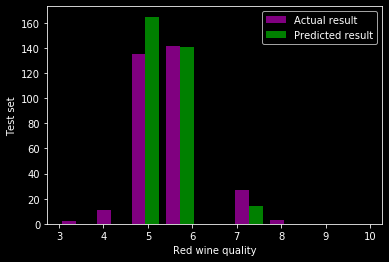

In [11]:
#Visualizing the test results
plt.style.use('dark_background')
bins = np.linspace(3,10,10)
plt.hist([y_test,y_pred],bins=bins,color=['purple','green'],label=['Actual result','Predicted result'])
plt.xlabel('Red wine quality')
plt.ylabel('Test set')
plt.legend()
plt.show()

---

In [12]:
##Training the K-NN model on the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
##Predicting test results
y_pred = classifier.predict(x_test)
print(y_pred)

[6 5 7 5 6 5 5 6 5 6 5 5 6 6 6 6 7 5 5 5 7 5 6 6 6 5 5 6 5 6 7 6 5 6 6 6 6
 5 5 7 5 6 6 5 6 5 5 6 5 6 5 5 5 7 5 5 5 5 6 5 5 5 6 6 5 6 5 5 6 7 5 5 5 5
 6 5 5 5 5 7 5 5 6 6 6 5 5 6 5 5 5 5 5 5 6 5 6 5 5 6 7 6 5 7 6 5 6 5 6 5 6
 5 6 5 7 6 5 7 4 6 5 5 5 5 6 6 5 5 6 6 5 5 6 6 5 5 6 5 5 5 6 5 5 5 5 6 6 5
 6 5 7 5 5 6 5 6 4 5 6 6 6 5 7 5 5 5 5 6 6 6 6 5 6 7 6 6 5 7 5 5 5 6 6 6 6
 5 5 5 5 6 7 5 5 5 5 5 5 6 5 5 5 6 6 6 5 5 6 6 6 6 6 5 5 7 6 5 6 5 6 5 6 7
 7 5 5 5 7 5 6 5 5 6 6 7 7 6 5 7 6 6 6 5 6 5 6 5 5 5 5 6 6 5 6 6 5 5 5 5 5
 6 5 6 6 5 5 5 5 5 5 5 6 5 6 6 6 6 6 5 6 5 6 6 5 6 6 5 5 5 6 6 5 6 5 5 5 6
 6 6 5 5 6 6 6 5 6 6 6 6 5 5 6 6 5 5 5 6 6 7 5 7]


In [14]:
##Calculating accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(ac)
print(cm)

0.534375
[[ 0  1  0  1  0  0]
 [ 0  0  8  3  0  0]
 [ 0  0 92 39  4  0]
 [ 0  1 58 71 12  0]
 [ 0  0  4 15  8  0]
 [ 0  0  1  0  2  0]]


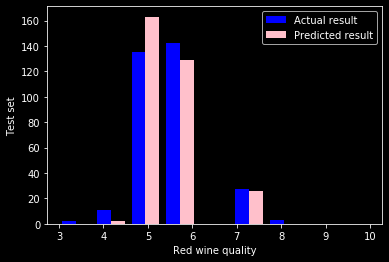

In [15]:
#Visualizing the test results
bins = np.linspace(3,10,10)
plt.hist([y_test,y_pred],bins=bins,color=['blue','pink'],label=['Actual result','Predicted result'])
plt.xlabel('Red wine quality')
plt.ylabel('Test set')
plt.legend()
plt.show()

---

In [16]:
##Training the Naive Bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
##Predicting test results
y_pred = classifier.predict(x_test)
print(y_pred)

[5 5 7 5 7 5 5 6 5 5 5 5 6 4 6 7 7 6 6 5 6 5 6 6 6 5 5 7 5 6 6 6 6 5 6 7 5
 6 8 6 5 6 8 7 6 5 6 6 6 7 6 6 6 7 6 5 5 5 7 5 5 6 6 6 5 6 5 7 6 6 5 4 5 5
 5 8 5 5 5 7 6 5 6 6 6 5 6 5 5 5 5 5 6 5 7 5 7 6 5 6 7 6 6 7 6 5 6 5 6 5 6
 5 7 5 6 6 6 7 6 6 5 6 4 5 8 7 5 5 6 7 5 5 6 6 7 5 7 4 7 6 6 5 6 6 5 6 7 7
 6 6 6 6 5 5 6 5 6 5 6 6 6 6 7 5 7 5 6 7 5 6 7 6 5 7 6 7 6 7 6 5 5 8 5 7 8
 5 5 6 5 6 6 6 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 7 6 5 6 7 4 7 5 5 6 6 6 5 5 6
 7 6 5 7 7 6 5 6 5 6 3 6 7 6 7 7 8 7 5 4 5 5 6 5 6 5 4 7 5 5 5 5 6 6 5 5 5
 6 5 8 5 6 5 5 6 5 5 7 6 6 6 8 7 6 7 5 7 7 5 7 6 7 6 5 6 5 7 6 6 4 6 5 5 6
 5 6 5 5 6 3 6 6 6 6 3 5 5 6 5 6 6 6 5 7 6 7 5 7]


In [18]:
##Calculating accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(ac)
print(cm)

0.540625
[[ 0  0  1  1  0  0]
 [ 0  0  7  3  0  1]
 [ 2  5 85 35  8  0]
 [ 0  3 31 73 29  6]
 [ 1  0  0  9 15  2]
 [ 0  0  0  0  3  0]]


---

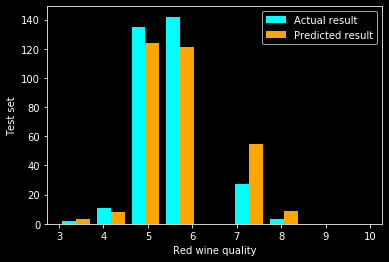

In [19]:
#Visualizing the test results
bins = np.linspace(3,10,10)
plt.hist([y_test,y_pred],bins=bins,color=['cyan','orange'],label=['Actual result','Predicted result'])
plt.xlabel('Red wine quality')
plt.ylabel('Test set')
plt.legend()
plt.show()

In [20]:
##Training the kernel SVM on the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
##Predicting test results
y_pred = classifier.predict(x_test)
print(y_pred)

[6 5 6 5 6 5 5 6 5 5 5 5 6 6 5 6 6 6 6 5 6 5 6 6 5 5 5 6 5 6 6 6 6 5 6 6 5
 5 6 6 5 6 6 6 6 5 5 6 5 6 5 5 6 6 5 5 5 5 6 5 5 6 6 6 5 6 5 5 6 7 5 5 5 5
 6 6 5 5 5 6 6 5 6 6 6 5 6 5 5 5 5 5 5 5 6 5 6 6 5 6 7 6 6 6 6 5 6 5 6 5 6
 5 6 5 6 6 5 7 6 6 5 6 5 5 6 6 5 5 6 6 5 5 6 6 6 5 6 5 6 5 6 5 5 5 5 6 6 6
 6 5 6 6 5 6 5 6 5 5 6 6 6 5 6 5 6 5 6 6 5 6 6 5 5 6 6 6 7 6 6 5 5 6 5 6 6
 5 6 6 5 6 6 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 6 6 5 6 5 5 6 5 5 6 6 6 5 5 6
 6 5 5 6 6 5 5 5 5 6 5 6 6 6 6 6 6 6 5 5 5 5 6 5 5 5 5 6 5 5 5 6 5 5 5 5 5
 6 5 6 5 6 5 5 5 5 5 6 5 5 5 6 7 6 6 5 6 6 5 6 5 6 5 5 5 5 6 6 6 6 6 5 5 6
 5 5 5 5 6 5 5 5 6 6 5 5 5 5 5 6 5 6 5 6 6 6 5 6]


In [22]:
##Calculating accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(ac)
print(cm)

0.6125
[[  0   0   2   0   0   0]
 [  0   0   8   3   0   0]
 [  0   0 105  29   1   0]
 [  0   0  50  90   2   0]
 [  0   0   1  25   1   0]
 [  0   0   0   2   1   0]]


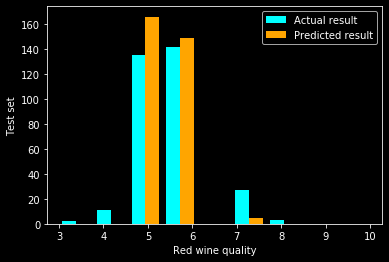

In [23]:
#Visualizing the test results
bins = np.linspace(3,10,10)
plt.hist([y_test,y_pred],bins=bins,color=['cyan','orange'],label=['Actual result','Predicted result'])
plt.xlabel('Red wine quality')
plt.ylabel('Test set')
plt.legend()
plt.show()

---

In [24]:
##Training the Decision Tree Classification model on the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [25]:
##Predicting test results
y_pred = classifier.predict(x_test)
print(y_pred)

[5 5 7 5 5 6 6 6 4 5 5 5 6 6 6 7 7 5 5 6 7 6 6 7 6 4 5 6 5 7 6 7 6 6 7 7 6
 6 6 6 6 6 6 7 6 6 5 6 5 6 5 4 6 6 6 5 5 5 7 6 5 6 6 5 5 6 5 5 6 6 5 6 4 5
 6 5 5 5 5 7 6 5 6 5 6 6 7 5 7 5 5 6 6 6 5 5 7 5 5 5 7 6 5 7 6 6 6 5 6 5 6
 5 8 5 6 6 7 7 7 6 5 6 6 5 8 7 5 5 6 6 6 5 6 6 6 5 6 5 7 5 6 5 5 5 5 6 8 6
 5 6 6 5 5 6 6 6 5 6 6 5 5 5 7 5 5 5 6 6 6 6 7 5 5 6 5 6 6 6 7 5 5 8 6 7 7
 5 7 5 5 5 6 5 5 6 5 5 5 5 5 5 6 6 6 6 6 5 5 6 6 6 6 6 5 8 5 6 5 6 6 5 5 5
 7 6 5 6 7 6 6 6 5 7 5 5 6 6 5 7 7 6 5 5 4 5 6 5 6 5 5 6 5 6 6 5 5 5 5 4 6
 7 5 6 5 6 5 4 7 5 5 6 6 6 5 6 7 6 7 6 6 7 5 7 6 5 6 5 5 5 7 6 5 5 6 6 5 6
 6 5 6 5 6 5 6 6 6 6 6 5 6 5 5 6 5 5 5 7 7 6 5 7]


In [26]:
##Calculating accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(ac)
print(cm)

0.634375
[[ 0  0  1  1  0  0]
 [ 0  3  3  3  2  0]
 [ 0  4 95 29  6  1]
 [ 0  0 29 92 20  1]
 [ 0  0  2  9 13  3]
 [ 0  0  0  1  2  0]]


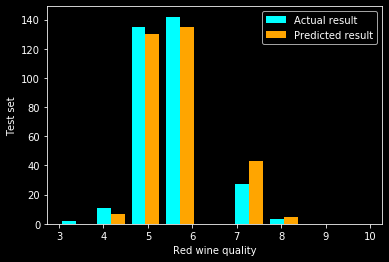

In [27]:
#Visualizing the test results
bins = np.linspace(3,10,10)
plt.hist([y_test,y_pred],bins=bins,color=['cyan','orange'],label=['Actual result','Predicted result'])
plt.xlabel('Red wine quality')
plt.ylabel('Test set')
plt.legend()
plt.show()

---

In [28]:
##Training the Random Forest Classification model on the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
##Predicting test results
y_pred = classifier.predict(x_test)
print(y_pred)

[6 5 7 5 5 6 5 6 5 5 5 5 6 6 5 6 7 5 5 5 6 5 6 6 5 5 5 7 5 6 6 6 6 5 7 7 5
 6 6 6 5 6 6 7 6 5 5 6 5 6 5 5 6 6 6 5 5 5 7 5 5 6 6 6 5 6 5 5 7 6 5 5 5 6
 6 6 5 5 5 7 6 5 6 5 6 5 6 5 5 5 5 6 6 5 6 5 6 5 5 5 7 6 6 6 5 5 5 5 6 5 6
 5 8 5 6 6 6 7 6 6 5 6 5 5 6 7 5 5 6 6 6 5 6 6 6 5 6 5 6 5 6 5 5 5 5 6 8 6
 5 5 6 5 5 5 6 6 5 5 6 6 6 6 7 5 5 5 6 6 6 6 6 6 5 7 5 6 5 7 7 5 5 7 6 6 7
 5 6 6 5 5 6 6 5 6 5 5 5 5 5 5 5 6 6 6 5 5 5 6 6 6 6 6 5 7 5 6 5 6 6 5 5 6
 6 5 6 6 6 6 6 6 5 6 5 5 6 6 6 7 7 6 5 5 5 5 6 5 5 5 5 6 5 5 5 6 5 6 5 5 5
 7 5 6 5 6 5 5 5 5 5 6 5 5 5 6 6 6 6 6 6 7 5 7 5 6 6 5 5 5 7 6 5 5 6 6 5 6
 6 5 5 5 6 5 6 6 6 6 6 5 6 5 5 6 5 5 5 6 6 7 5 7]


In [30]:
##Calculating accuracy score and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(ac)
print(cm)

0.721875
[[  0   0   1   1   0   0]
 [  0   0   7   4   0   0]
 [  0   0 114  19   2   0]
 [  0   0  30 103   9   0]
 [  0   0   1  10  14   2]
 [  0   0   0   1   2   0]]


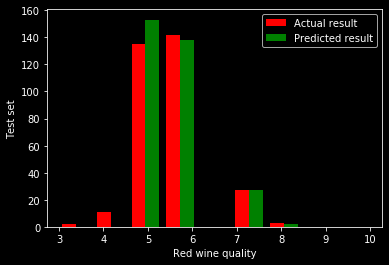

In [31]:
#Visualizing the test results
bins = np.linspace(3,10,10)
plt.hist([y_test,y_pred],bins=bins,color=['red','green'],label=['Actual result','Predicted result'])
plt.xlabel('Red wine quality')
plt.ylabel('Test set')
plt.legend()
plt.show()

---